In [ ]:
from __future__ import print_function
import tensorflow as tf
import os
import numpy as np
from PIL import Image

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
# number 1 to 2 data

In [ ]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
import mnist2.mnist as mn
mnist = mn.read_data_sets('MNIST/', one_hot=True, num_classes=2)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    inital = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(inital)

def bias_variable(shape):
    inital = tf.constant(0.1, shape=shape)
    return tf.Variable(inital)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


# define placeholder for inputs to network

xs = tf.placeholder(tf.float32, [None, 784, 1]) # 28x28

ys = tf.placeholder(tf.float32, [None, 2])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])

## conv1 layer ##

W_conv1 = weight_variable([5, 5, 1, 32]) #patch 5x5, in channel size 1, out size 32

## pool1 layer ##

b_conv1 = bias_variable([32])
#Combine

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) #output size 28x28x32

h_pool1 = max_pool_2x2(h_conv1) #output size 14x14x32



## conv2 layer ##

W_conv2 = weight_variable([5, 5, 32, 64]) #patch 5x5, in channel size 32, out size 64

## pool2 layer ##

b_conv2 = bias_variable([64])
#Combine

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) #output size 14x14x64

h_pool2 = max_pool_2x2(h_conv2) #output size 7x7x64

## fc1 layer ##

W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64]) #[n_samples, 7,7,64]  => [n_samples, 7*7*64]

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## output layer ##

W_fc2 = weight_variable([1024, 2])
b_fc2 = bias_variable([2])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
pred_argm = tf.argmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)



sess = tf.Session()
sess.run(tf.initialize_all_variables())


# save all the variables.
saver = tf.train.Saver(max_to_keep=1)


# You can try to change 150 to 10000
for i in range(100):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob:0.5})
    if i % 50 == 0:
       print(compute_accuracy(mnist.test.images, mnist.test.labels))



In [ ]:
testimage = np.zeros((256, 256, 1))
img = Image.open('./prediction_images/test1.png')
#img = numpy.asarray(PIL.Image.open('./prediction_images/test1.png')
#img = img.resize((28, 28))

testimage=np.array(img).reshape(256,256,1)


x0=128
y0=128
patchimage=testimage[x0:x0+28,y0:y0+28,0]
testpatchimage = np.array(patchimage).reshape(1,784,1)


pred_soft, pred_arg = sess.run([prediction, pred_argm],feed_dict={xs:testpatchimage,keep_prob:0.5})

print(pred_soft)
print(pred_arg)
print(pred_arg.shape)


savefile='./tmp/model_ckpt'
saver.save(sess,savefile)


In [11]:
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
from matplotlib import cm
from matplotlib.colors import NoNorm
import pylab
from scipy import misc
from PIL import Image
import numpy as np

C:\Users\tccnchsucyut\free_network_workshop


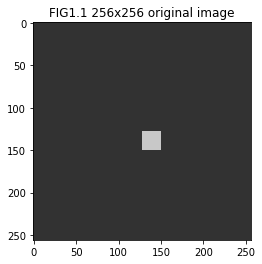

In [12]:
plt.title('FIG1.1 256x256 original image') # When you want to read all images please mark this line statment
from matplotlib.image import imread
print(os.getcwd())
#img=imread('./prediction_images/bin1.png')# read image png format
#img = np.asarray(Image.open('./prediction_images/bin1.png'))
plt.imshow(img, cmap=plt.cm.gray, norm=NoNorm())
plt.show()

In [13]:
def segmentation_binary(patchimage):
    #print(patchimage.shape)
    testpatchimage = np.array(patchimage).reshape(1,784,1)
    #print(patchimage.shape)
    #plt.imshow(patchimage, cmap=plt.cm.gray, norm=NoNorm()) # When you want to read all images please mark this line statment
    #print(patchimage.shape)
    #print(patchimage.dtype.name)
    #plt.title('FIG1.2 32x32 patch image') # When you want to read all images please mark this line statment
    #plt.show() # When y
    patchimage=np.array(patchimage, dtype='float32')
    testpatchimage = np.array(patchimage).reshape(1,784,1)
    #Convert from [0, 255] -> [0.0, 1.0].
    testpatchimage=np.multiply(testpatchimage, 1.0 / 255.0)
    #print(testpatchimage)
    #normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    #tva = [ (255-x)*1.0/255.0 for x in tv] 
    #print(testpatchimage.dtype)
    #print(testpatchimage.shape)
    #v_xs=testpatchimage
    values=sess.run(prediction,feed_dict={xs:testpatchimage,keep_prob:0.5})
    #print(values)
    binlabel=np.argmax(values)
    return binlabel

In [14]:
testimage = np.zeros((256,256, 1),dtype =np.uint8)
img = Image.open('./prediction_images/bin1.png')
#img.show()
testimage=np.array(img).reshape(256,256,1)
print(testimage.dtype.name)
x0=124
y0=124
patchimage=testimage[x0:x0+28,y0:y0+28,0]
binlabel=segmentation_binary(patchimage)
print(binlabel)

uint8
1


Text(0.5,1,'FIG2 prediction binary image')

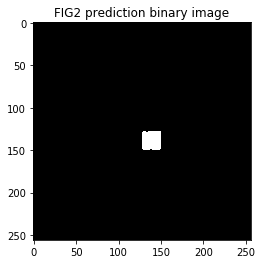

In [15]:
binw=256
binh=256
#binarray =0*np.ones((binw,binh), dtype=np.bool)
binarray =np.full((binw,binh), False, dtype=np.uint8)
for j in range(256-28):
    for i in range(256-28):
     x0=i
     y0=j
     patchimage=testimage[x0:x0+28,y0:y0+28,0]
     binlabel=segmentation_binary(patchimage)
     #print(binlabel)
     if binlabel == 1:
        binarray[x0+14,y0+14]=255


plt.imshow(binarray, cmap=plt.cm.gray)
plt.title('FIG2 prediction binary image')



In [18]:
# Convert array to Image
imgbinarray = Image.fromarray(binarray)
imgbinarray.save('./prediction_images/bin2result.png')
#result of synthetic image segmentation

In [17]:
#Open I as an array:

#I = numpy.asarray(PIL.Image.open('test.jpg'))
#Do some stuff to I, then, convert it back to an image:
#im = PIL.Image.fromarray(numpy.uint8(I))